In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')

In [3]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
data['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [6]:
data['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

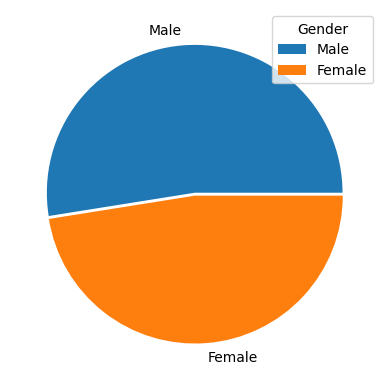

In [7]:
plt.pie(data['Gender'].value_counts() , labels = data['Gender'].unique() , explode= [0.01,0.01])
plt.legend(title = "Gender")
plt.show()

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


<Axes: xlabel='Age'>

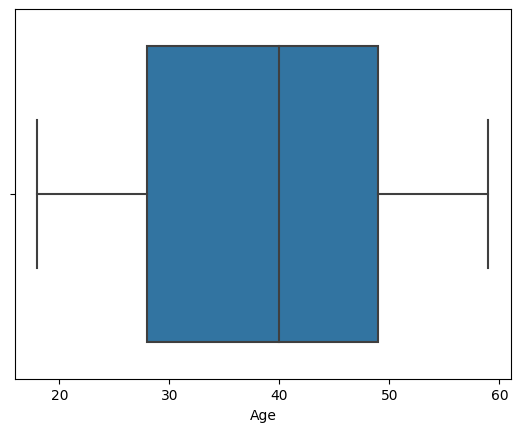

In [10]:
sns.boxplot(data=data, x="Age")

In [11]:
data['Gender'].replace({'Male':1 , "Female":0}, inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Workout_Type'] = lb.fit_transform(data['Workout_Type'])

In [13]:
x = data.drop('BMI' , axis=1)
y = data['BMI']

In [14]:
# split model
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(x_train , y_train)
predicted = model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(rmse)
print(r2)

0.741719357744212
0.9849390093753657
